In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_stocks_5yr.csv')
print(df.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [3]:
print(df.columns)
print(df['Name'].nunique())  # Total unique companies
print(df.isnull().sum())

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
505
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
tech_stocks = df[df['Name'].isin(['GOOGL', 'AMZN', 'AAPL'])]

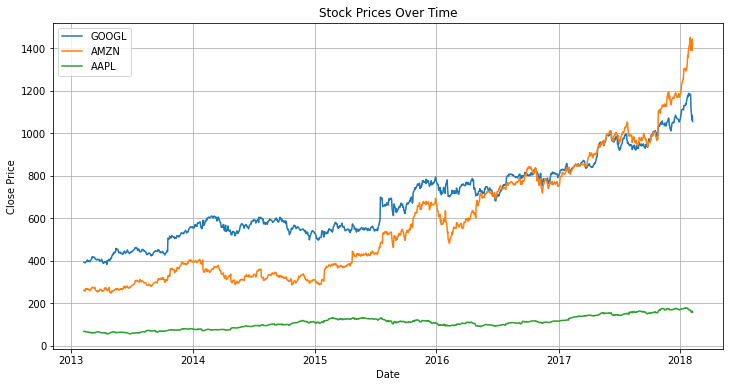

In [6]:
plt.figure(figsize=(12,6))
for company in ['GOOGL', 'AMZN', 'AAPL']:
    sub_df = tech_stocks[tech_stocks['Name'] == company]
    plt.plot(sub_df['date'], sub_df['close'], label=company)
plt.legend()
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [7]:
def compute_daily_return(df, name):
    df = df[df['Name'] == name]
    df['daily_return'] = df['close'].pct_change()
    return df

apple = compute_daily_return(tech_stocks, 'AAPL')

C:\Users\Kartik\anaconda\envs\booksenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
def compute_daily_return(df, name):
    df = df[df['Name'] == name].copy()
    df['daily_return'] = df['close'].pct_change()
    return df

apple = compute_daily_return(tech_stocks, 'AAPL')

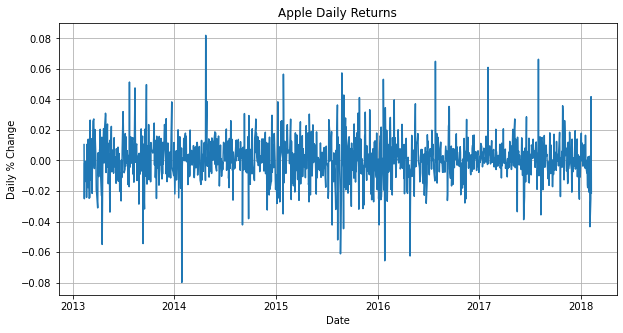

In [9]:
plt.figure(figsize=(10,5))
plt.plot(apple['date'], apple['daily_return'], label='AAPL Daily Return')
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.grid(True)
plt.show()

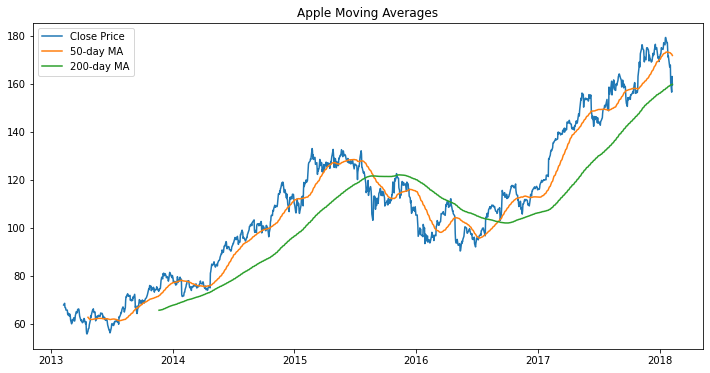

In [10]:
apple['MA50'] = apple['close'].rolling(window=50).mean()
apple['MA200'] = apple['close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(apple['date'], apple['close'], label='Close Price')
plt.plot(apple['date'], apple['MA50'], label='50-day MA')
plt.plot(apple['date'], apple['MA200'], label='200-day MA')
plt.legend()
plt.title('Apple Moving Averages')
plt.show()

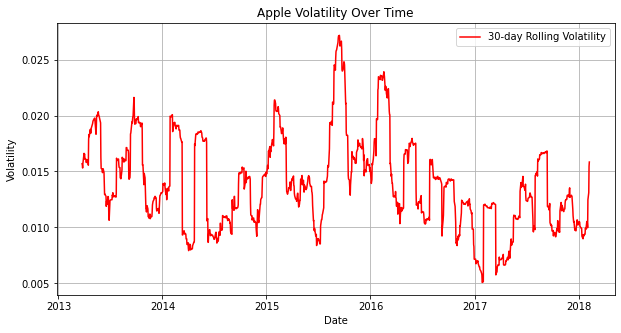

In [11]:
apple['volatility'] = apple['daily_return'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(apple['date'], apple['volatility'], color='red', label='30-day Rolling Volatility')
plt.title('Apple Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()